# Imports Libraries

In [16]:
# Python Standard Libraries
import os

# Numpy Library
import numpy as np # linear algebra

# Pandas Library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# MATPLOT Library
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# SKLearn Library
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix, average_precision_score, roc_curve, auc, multilabel_confusion_matrix

# PYLAB Library
from pylab import bone, pcolor, colorbar, plot, show, title

# Declare the paths and load data

In [23]:
data_path = '../data'
nbaiot_data_path = os.path.join(data_path, 'nbaiot')
nbaiot_20K_data_path = os.path.join(data_path, 'nbaiot_20K')
nbaiot_10K_data_path = os.path.join(data_path,'nbaiot_10K')
nbaiot_5K_data_path = os.path.join(data_path, 'nbaiot_5K')
nbaiot_1K_data_path = os.path.join(data_path, 'nbaiot_1K')

In [18]:
# for _, _, files in os.walk(nbaiot_data_path):
#     print(len(files))
#     for file in files:
#         print(file)
def get_all_files():
    all_files = []
    for _, _, files in os.walk(nbaiot_data_path):
        for file in files:
            all_files.append(file)
    return sorted(all_files)
#     print(len(files))

In [19]:
all_files = get_all_files()
print(all_files[:10])

['1.benign.csv', '1.gafgyt.combo.csv', '1.gafgyt.junk.csv', '1.gafgyt.scan.csv', '1.gafgyt.tcp.csv', '1.gafgyt.udp.csv', '1.mirai.ack.csv', '1.mirai.scan.csv', '1.mirai.syn.csv', '1.mirai.udp.csv']


In [20]:
dn_nbaiot = ['Danmini_Doorbell', 'Ecobee_Thermostat', 'Ennio_Doorbell', 'Philips_B120N10_Baby_Monitor', \
             'Provision_PT_737E_Security_Camera', 'Provision_PT_838_Security_Camera', \
             'Samsung_SNH_1011_N_Webcam', 'SimpleHome_XCS7_1002_WHT_Security_Camera', \
             'SimpleHome_XCS7_1003_WHT_Security_Camera']

In [26]:
# get files
def get_files_index(index):
    files = []
    for file in all_files:
        if str(index) in file:
            files.append(file)
    return files

def get_file_data(filename):
    df = pd.read_csv(filename)
    print(filename, ': ', len(df))

def get_data_index(index):
    dfs = []
    for file in get_files_index(1):
        df = pd.read_csv(os.path.join(nbaiot_data_path, file))
        dfs.append(df)
    return dfs

def get_chunk_data(filename):
    df = pd.read_csv(os.path.join(nbaiot_data_path, filename))
    print(filename, ': ', len(df))
    df_1K = df[:1000]
    save_file = os.path.join(nbaiot_1K_data_path, filename)
    df_1K.to_csv(save_file)
        
    df_5K = df[:5000]
    save_file = os.path.join(nbaiot_5K_data_path, filename)
    df_5K.to_csv(save_file)
    
    df_10K = df[:10000]
    save_file = os.path.join(nbaiot_10K_data_path, filename)
    df_10K.to_csv(save_file)
    
    df_20K = df[:20000]
    save_file = os.path.join(nbaiot_20K_data_path, filename)
    df_20K.to_csv(save_file)

In [27]:
for filename in all_files[:10]:
    get_chunk_data(filename)
#     get_file_data(os.path.join(nbaiot_data_path, filename))

1.benign.csv :  49548
1.gafgyt.combo.csv :  59718
1.gafgyt.junk.csv :  29068
1.gafgyt.scan.csv :  29849
1.gafgyt.tcp.csv :  92141
1.gafgyt.udp.csv :  105874
1.mirai.ack.csv :  102195
1.mirai.scan.csv :  107685
1.mirai.syn.csv :  122573
1.mirai.udp.csv :  237665


In [28]:
for filename in all_files[10:]:
    get_chunk_data(filename)
#     get_file_data(os.path.join(nbaiot_data_path, filename))

1.mirai.udpplain.csv :  81982
2.benign.csv :  13113
2.gafgyt.combo.csv :  53012
2.gafgyt.junk.csv :  30312
2.gafgyt.scan.csv :  27494
2.gafgyt.tcp.csv :  95021
2.gafgyt.udp.csv :  104791
2.mirai.ack.csv :  113285
2.mirai.scan.csv :  43192
2.mirai.syn.csv :  116807
2.mirai.udp.csv :  151481
2.mirai.udpplain.csv :  87368
3.benign.csv :  39100
3.gafgyt.combo.csv :  53014
3.gafgyt.junk.csv :  29797
3.gafgyt.scan.csv :  28120
3.gafgyt.tcp.csv :  101536
3.gafgyt.udp.csv :  103933
4.benign.csv :  175240
4.gafgyt.combo.csv :  58152
4.gafgyt.junk.csv :  28349
4.gafgyt.scan.csv :  27859
4.gafgyt.tcp.csv :  92581
4.gafgyt.udp.csv :  105782
4.mirai.ack.csv :  91123
4.mirai.scan.csv :  103621
4.mirai.syn.csv :  118128
4.mirai.udp.csv :  217034
4.mirai.udpplain.csv :  80808
5.benign.csv :  62154
5.gafgyt.combo.csv :  61380
5.gafgyt.junk.csv :  30898
5.gafgyt.scan.csv :  29297
5.gafgyt.tcp.csv :  104510
5.gafgyt.udp.csv :  104011
5.mirai.ack.csv :  60554
5.mirai.scan.csv :  96781
5.mirai.syn.csv :  6

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 3


In [7]:
def visualize(index):
    devive_name = dn_nbaiot[index]
    dfs = get_data_index(index)
#     for df in dfs:
#         df.plot.scatter()

In [8]:
dfs = get_data_index(1)

In [10]:
len(dfs)

11

In [10]:
dfs[0].head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0


In [11]:
# pd.plotting.scatter_matrix(dfs[0].head(), alpha=0.2)

In [12]:
df_show = dfs[0].head()

In [14]:
len(df_show)

5

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

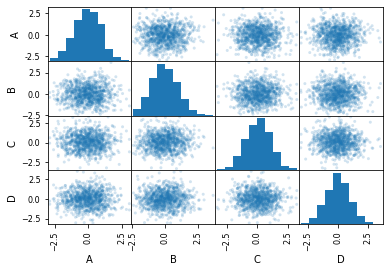

In [15]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
pd.plotting.scatter_matrix(df, alpha=0.2)